In [3]:
import numpy as np

fs = 3.2e6

# filename = '/home/axlan/data/gqrx_20210508_022820_433900000_3200000_fc.raw'
# offset = int(2.193 * fs * 8)
# if offset % 2:
#     offset += 1
# count = int(0.25 * fs )

# out_name = 'spun'
# filename = '/home/axlan/data/gqrx_20210508_054747_433900000_3200000_fc.raw'
# offset = int(1.82 * fs * 8)
# if offset % 2:
#     offset += 1
# count = int(0.3 * fs )

out_name = 'still'
filename = '/home/axlan/data/gqrx_20210508_054923_433900000_3200000_fc.raw'
offset = int(1.72 * fs * 8)
if offset % 2:
    offset += 1
count = int(0.3 * fs )


# count = -1

data = np.fromfile(filename, dtype=np.csingle, count=count, offset=offset)
count = len(data)

mag_data = np.abs(data)


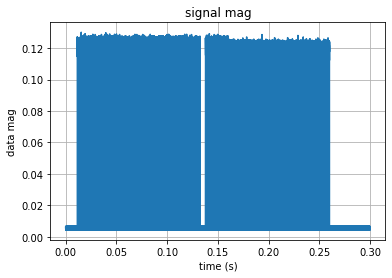

In [4]:
import matplotlib
import matplotlib.pyplot as plt


# Data for plotting
t = np.arange(0.0, count , 1) / fs

s = mag_data

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='data mag',
       title='signal mag')
ax.grid()

plt.show()

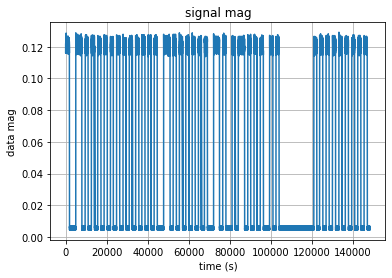

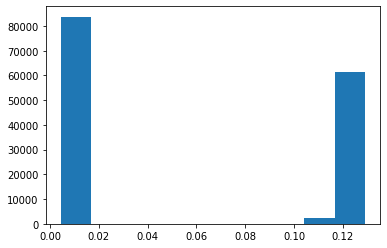

In [5]:

# period = 46.3uS
# rate =  ~2158Hz
symbol_len = 1483

test_len = symbol_len * 100

test_offset = 320000



s = mag_data[test_offset:test_len + test_offset]

fig, ax = plt.subplots()
ax.plot( s)

ax.set(xlabel='time (s)', ylabel='data mag',
       title='signal mag')
ax.grid()

plt.show()

plt.hist(s)
plt.show()



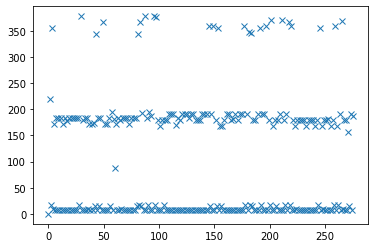

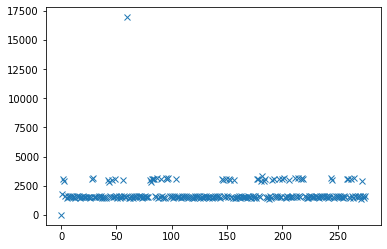

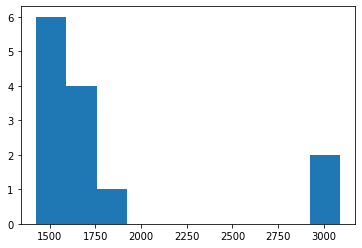

In [6]:
test_len = 403000
test_len = count

s = mag_data[test_offset:test_offset + test_len]

threshold = .015
sample_len = 1
num_diff = 4

reshape_data = np.reshape(s, (-1,sample_len))

resampled =np.sum(reshape_data, axis=1)

idxs = [0]
state = 0
for idx in range(num_diff - 1, len(resampled)):
    start = idx - num_diff + 1
    if state == 0:
        test_vals = resampled[start:idx] > threshold
        if all(test_vals):
            idxs.append(start)
            state = 1
    else:
        test_vals = resampled[start:idx] < threshold
        if all(test_vals):
            idxs.append(start)
            state = 0

raw_data = []

for i in range(1, len(idxs)):
    start = idxs[i-1]
    end = idxs[i]
    raw_data.append(np.sum(resampled[start:end]))

plt.plot( raw_data, 'x')
plt.show()

plt.plot( np.diff(idxs), 'x')
plt.show()
plt.hist( np.diff(idxs[1:15]))
plt.show()



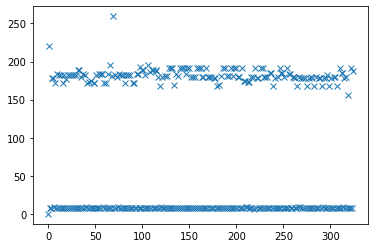

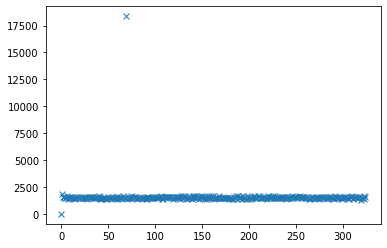

In [7]:

threshold = 20

max_len = 2000

fixed_idx = [0]

for i in range(1, len(idxs)):
    start = idxs[i-1]
    end = idxs[i]
    cur_len = end - start
    if cur_len > max_len:
        if cur_len / 2 > max_len:
            split_idx = len(fixed_idx)
            continue
        fixed_idx.append(start + int(cur_len / 2))
    fixed_idx.append(end)

raw_data = np.zeros((len(fixed_idx) - 1))

for i in range(1, len(fixed_idx)):
    start = fixed_idx[i-1]
    end = fixed_idx[i]
    raw_data[i-1] = np.sum(resampled[start:end])

plt.plot( raw_data, 'x')
plt.show()

plt.plot( np.diff(fixed_idx), 'x')
plt.show()

In [8]:


msg1 = raw_data[:split_idx-1] > threshold
msg2 = raw_data[split_idx:] > threshold

print(len(msg1))
print(len(msg2))

with open('../out/'+out_name+'.csv','w') as fd:
    vals = ','.join([ '1' if i else '0' for i in msg1 ])
    print(f'{vals}', file=fd)
    vals = ','.join([ '1' if i else '0' for i in msg2 ])
    print(f'{vals}', file=fd)


# 246
# 254



69
255


In [9]:
still_msg = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1]

spun_msg = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0]


def make_bits(msg):
    bits = []
    for i in range(0,len(msg),2):
        assert(msg[i] != msg[i + 1])
        bits.append(msg[i])
    return bits

still_bits = make_bits(still_msg)
spun_bits = make_bits(spun_msg)

print(still_bits)
print(spun_bits)


# at offset 88 humidity 50% (1, 1, 0, 0, 1, 0,)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]


In [10]:
a = np.array([1]+spun_bits)
rs = a.reshape((-1, 8))
print(rs)
for val in rs:
    binval = ''.join([str(i) for i in val])
    print(int(binval,2))


[[1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1]
 [1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [1 0 0 0 0 1 0 0]
 [0 1 1 0 1 1 1 0]
 [0 0 1 1 0 0 1 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1]
 [1 1 1 1 1 0 1 1]
 [1 0 0 0 1 0 0 1]]
255
212
197
224
0
0
154
0
18
132
110
50
255
251
251
137
